In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from numpy.random import randn
from numpy import random as rn
from scipy.stats import norm, kurtosis, skew
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
Amin=10000
Amax=20000
Bmin=15000
Bmax=15000
Cmin=7500
Cmax=12000
Dmin=4800
Dmax=6200
Emin=20000
Emax=25000
Fmin=5000
Fmax=7000
Loss = 0.02

In [3]:
M = 544
N = 6

In [4]:
Z = np.random.uniform(0,1,(M,N))

In [5]:
A = 1*np.ones((M,1))
B = 1*np.ones((M,1))
C = 1*np.ones((M,1))
D = 1*np.ones((M,1))
E = 1*np.ones((M,1))
F = 1*np.ones((M,1))

In [6]:
for i in range(0,M):
    A[i,0] = Z[i,0]*(Amax-Amin)+Amin
    B[i,0] = Z[i,1]*(Bmax-Bmin)+Bmin
    C[i,0] = Z[i,2]*(Cmax-Cmin)+Cmin
    D[i,0] = Z[i,3]*(Dmax-Dmin)+Dmin
    E[i,0] = Z[i,4]*(Emax-Emin)+Emin
    F[i,0] = Z[i,5]*(Fmax-Fmin)+Fmin

In [7]:
Total = 1*np.ones((M,1))
for i in range(0,M):
    Total[i,0] = A[i,0]+B[i,0]+C[i,0]+D[i,0]+E[i,0]+F[i,0]

In [8]:
def stdevp(data):
...     # Number of observations
...     n = len(data)
...     # Mean of the data
...     mean = sum(data) / n
...     # Square deviations
...     deviations = [(x - mean) ** 2 for x in data]
...     # Variance
...     stdevp = (sum(deviations) / n)**0.5
...     return stdevp

In [9]:
Totalmin = Amin+Bmin+Cmin+Dmin+Emin+Fmin
Totalmax = Amax+Bmax+Cmax+Dmax+Emax+Fmax
Totalavg = np.mean((Totalmin,Totalmax))

The Monte Carlo method provides an estimate of the expected value of a random variabe and also predicts the estimation error, which is proportional to the number of iterations.

We can estimate an upper bound of the total error by calculating the standard deviation between the maximum, the minimum, and averages values of the random variable:

In [10]:
sigma = np.std((Totalmin,Totalmax,Totalavg))
print("\033[1m The upper bound of the total error is:", "{:.0f}".format(sigma))

 The upper bound of the total error is: 9349


Lets determine the number of iterations required for an error of loss is less than 2%. A gross estimation of the random variable is the average of the maximum value and the minimum value. An absolute error of 2% is the average multiplied by 0.02:

In [11]:
epsilon = int(round(Totalavg*Loss,0))
print("\033[1m The absolute error of 2% is:", "{:.0f}".format(epsilon))

 The absolute error of 2% is: 1475


Therefore the number of iterations to obtain a result with an error of less than 2% is:

In [12]:
Num = int(round((3*sigma/epsilon)**2,0))
print("\033[1m The number of iterations to obtain a result with an error of less than 2%:", "{:.0f}".format(Num))

 The number of iterations to obtain a result with an error of less than 2%: 362


The expected value of the random variable is the average of the total column:

In [13]:
Expected_Value = np.mean(Total)
print("\033[1m The expected value is:", "{:.0f}".format(Expected_Value))

 The expected value is: 73816


Given the variable is normally distributed, the median should be very close to the mean

In [14]:
Median = np.median(Total)
print("\033[1m The median is:", "{:.0f}".format(Median))

 The median is: 73779


In [15]:
diff1 = (Median/Expected_Value)-1
print("\033[1m A difference of only:", "{:.1%}".format(abs(diff1)))

 A difference of only: 0.0%


In [16]:
sigma1 = np.std(Total)
print("\033[1m The standard deviation is:", "{:.0f}".format(sigma1))

 The standard deviation is: 3478


We can now review the true error of the estimate:

In [17]:
TrueError = (3*sigma1)/np.sqrt(Num)
print("\033[1m The true error of the estimate is:", "{:.0f}".format(TrueError))

 The true error of the estimate is: 548


In [18]:
gap = (TrueError/Expected_Value)
print("\033[1m This is an error of only", "{:.1%}".format(gap))

 This is an error of only 0.7%


Other useful information is the Kurtosis and the Skewness of the shape compared with the shape of a normal distribution. The normal distribution has an excess kurtosis of 0.

In [19]:
Kurt = float(kurtosis(Total))
print("\033[1m The excess kurtosis of our distribution is:", "{:.3f}".format(Kurt))

 The excess kurtosis of our distribution is: -0.695


This indicates that the distribution is somewhat flatter than a normal distribution.

Skewness is a measure of asymmetry. The normal distribution has a skewness of 0.

In [20]:
Skew = float(skew(Total))
print("\033[1m The skewness of our distribution is", "{:.3f}".format(Skew))

 The skewness of our distribution is -0.024


This indicates that the tail of the distribution extands towards the right.

The results can be easily plotted to produce of the following chart:

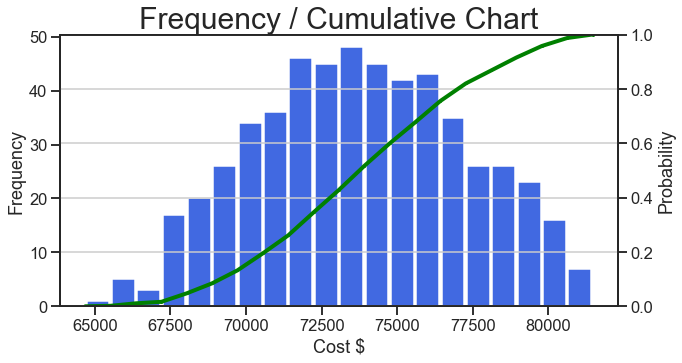

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Cost $"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "royalblue", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=30)
        ax.set_xlabel(self.xlabel, fontsize=18)
        ax.set_ylabel(self.ylabels[0],  fontsize=18)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="g", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=18)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 20  # Data grouping
    plot1 = Histplot(Total, num_bins=bins, fsize=(10, 5))
    plot1.draw_plot()